In [2]:
"""
Chart Visualtions for stocks using seaborn library
"""

%run assets/libraries_import.ipynb
%run assets/functions.ipynb


link_usdt_data_frame = return_data_frame(return_data_query(crypto_list[0],from_period,to_period,interval)) #LINK/USDT data frame
dot_usdt_data_frame = return_data_frame(return_data_query(crypto_list[1],from_period,to_period,interval)) #DOT/USDT data frame
uniswap_data_frame = return_data_frame(return_data_query(crypto_list[2],from_period,to_period,interval)) #UNI/USDT data frame

In [3]:
link_usdt_data_frame.describe()

,Open,High,Low,Close,Adj Close,Volume
count,62.000000,62.000000,62.000000,62.000000,62.000000,6.200000e+01
mean,26.446977,27.469375,25.141081,26.274486,26.274486,1.097785e+09
std,5.488748,5.650889,5.460357,5.510837,5.510837,4.275436e+08
min,17.787418,18.573771,15.549089,17.587616,17.587616,5.803661e+08
25%,20.509765,21.423813,19.363434,20.509371,20.509371,8.285989e+08
50%,26.655825,27.554596,25.669477,26.392433,26.392433,9.818458e+08
75%,31.623636,32.398068,29.894839,31.429160,31.429160,1.241650e+09
max,34.750072,38.161388,33.556553,34.837170,34.837170,2.719352e+09


In [4]:
dot_usdt_data_frame.describe()

,Open,High,Low,Close,Adj Close,Volume
count,62.000000,62.000000,62.000000,62.000000,62.000000,6.200000e+01
mean,38.251718,39.578446,36.245301,37.988613,37.988613,1.637471e+09
std,9.100063,9.286630,8.865694,9.158440,9.158440,7.340236e+08
min,24.042261,25.018566,23.313160,24.050674,24.050674,7.446986e+08
25%,29.209766,29.864909,26.810624,28.510378,28.510378,1.193242e+09
50%,39.485596,41.204811,38.100279,39.207693,39.207693,1.390012e+09
75%,44.759854,45.957020,42.232076,44.648193,44.648193,1.876235e+09
max,53.877750,55.004974,52.254654,53.881733,53.881733,4.338985e+09


In [5]:
uniswap_data_frame.describe()

,Open,High,Low,Close,Adj Close,Volume
count,62.000000,62.000000,62.000000,62.000000,62.000000,6.200000e+01
mean,21.105701,21.816293,20.152101,20.956151,20.956151,3.132488e+08
std,4.173963,4.244933,4.218872,4.135194,4.135194,1.400840e+08
min,14.156897,15.010784,13.444022,14.148139,14.148139,1.425108e+08
25%,17.186579,17.805795,15.958156,17.200514,17.200514,2.199742e+08
50%,21.308180,22.203385,20.564576,21.238249,21.238249,2.739112e+08
75%,25.146968,25.661903,24.173293,24.979548,24.979548,3.511362e+08
max,26.869978,28.431030,26.298906,26.855335,26.855335,7.786331e+08


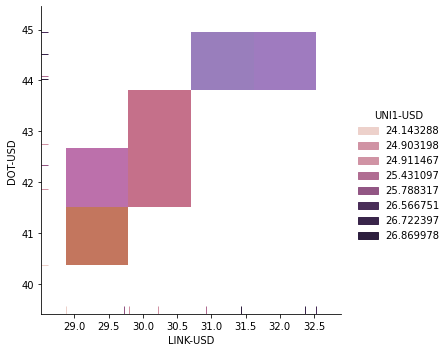

In [33]:
#Function to show histogram
def show_histogram_seaborn(merged_data,x_label,y_label):
        histogram = sns.displot(merged_data, x=x_label,y=y_label,hue=crypto_list[2],kind="hist",rug=True)
        sns.color_palette("light:#5A9", as_cmap=True)
        histogram.set_axis_labels(x_label,y_label)
        

show_histogram_seaborn(return_grouped_data_frame('Open',crypto_list).head(8),crypto_list[0],crypto_list[1])

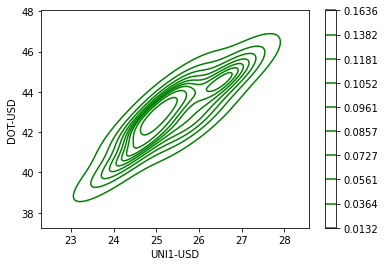

In [34]:
#Function to show Destiny Estimate kernel
def show_kernel_destiny_estimate_seaborn(merged_data,x_label,y_label):
        sns.kdeplot(data=merged_data, x=x_label,y=y_label,shade=False,bw_adjust=1, color="green",vertical=False,legend=True,cumulative=False,cbar=True)   
        
show_kernel_destiny_estimate_seaborn(return_grouped_data_frame('Close',crypto_list).head(8),crypto_list[2],crypto_list[1])

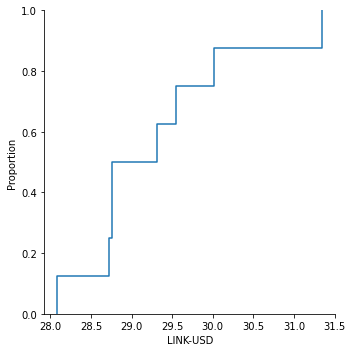

In [52]:
#Function to show empirical cumulative distributions
def show_empirical_cumulative_distributions_seaborn(merged_data):
    sns.displot(merged_data,x=crypto_list[0],kind="ecdf")
    
show_empirical_cumulative_distributions_seaborn(return_grouped_data_frame('Low',crypto_list).head(8))      

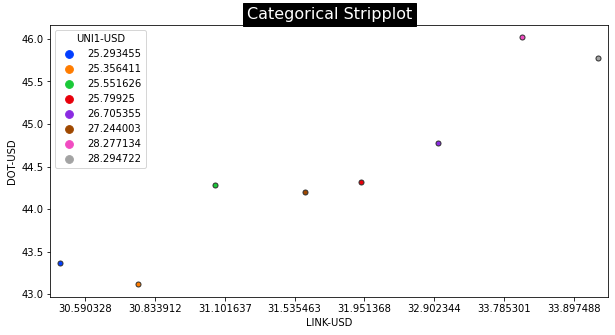

In [53]:
#Function to show categorical stripplot
def show_categorical_stripplot_seaborn(merged_data,title):
    plt.figure(figsize=(10,5))
    plt.title(title,fontsize=16,color='white',backgroundcolor='black',fontweight='normal')
    sns.stripplot(x=crypto_list[0],y=crypto_list[1],hue=crypto_list[2],data=merged_data,linewidth=1,palette="bright", dodge=True)
show_categorical_stripplot_seaborn(return_grouped_data_frame('High',crypto_list).head(8),"Categorical Stripplot")    

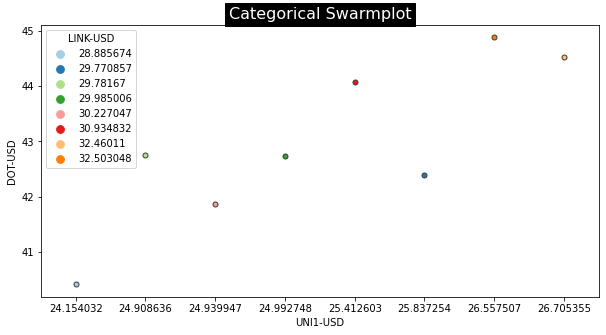

In [54]:
#Function to show categorical swarmplot
def show_categorical_swarmplot_seaborn(merged_data,title):
        plt.figure(figsize=(10,5))
        plt.title(title,fontsize=16,color='white',backgroundcolor='black',fontweight='normal')
        sns.swarmplot(x=merged_data[crypto_list[2]],y=merged_data[crypto_list[1]],hue=crypto_list[0],data=merged_data,linewidth=1,palette="Paired")
        
show_categorical_swarmplot_seaborn(return_grouped_data_frame('Adj Close',crypto_list).head(8),"Categorical Swarmplot")    

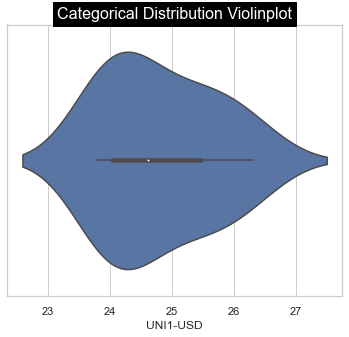

In [78]:
#Function to show distribution_violinplot
def show_categorical_distribution_violinplot_seaborn(merged_data,title):
    plt.figure(figsize=(6,5))
    plt.title(title,fontsize=16,color='white',backgroundcolor='black',fontweight='normal')
    sns.violinplot(x=merged_data[crypto_list[2]])
  
show_categorical_distribution_violinplot_seaborn(return_grouped_data_frame('Low',crypto_list).head(8),"Categorical Distribution Violinplot")

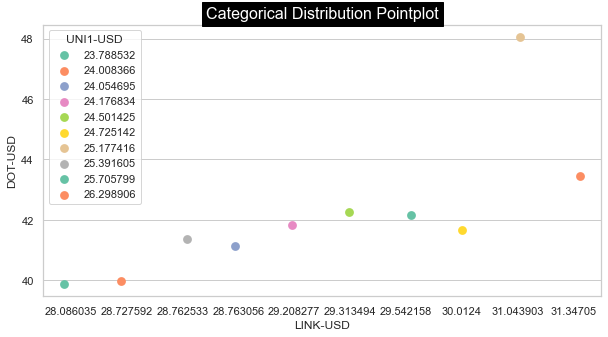

In [85]:
#Function to show Categorical Distribution Pointplot
def show_categorical_distribution_pointplot(merged_data,title):
    plt.figure(figsize=(10,5))
    plt.title(title,fontsize=16,color='white',backgroundcolor='black',fontweight='normal')
    sns.pointplot(x=merged_data[crypto_list[0]],y=merged_data[crypto_list[1]],hue=merged_data[crypto_list[2]],data=merged_data,dodge=True,palette="Set2")
    
show_categorical_distribution_pointplot(return_grouped_data_frame('Low',crypto_list).head(10),"Categorical Estimate Pointplot")    

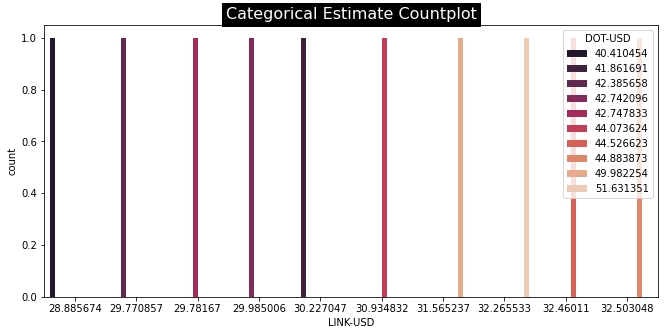

In [32]:
#Function to show categorical estimate countplot
def show_categorical_estimate_countplot(merged_data,title):
    plt.figure(figsize=(11,5))
    plt.title(title,fontsize=16,color='white',backgroundcolor='black',fontweight='normal')
    sns.countplot(x=data[crypto_list[0]],hue=data[crypto_list[1]],data=merged_data,palette="rocket",dodge=True)  

show_categorical_estimate_countplot(return_grouped_data_frame('Adj Close',crypto_list).head(10),"Categorical Estimate Countplot")

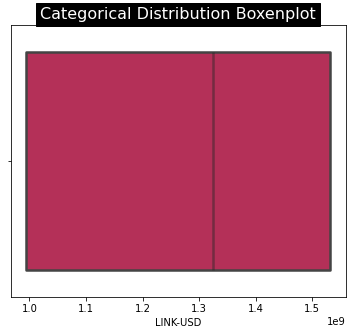

In [51]:
#Function to show categorical distribution boxenplot
def show_categorical_distribution_boxenplot(merged_data,title):
    plt.figure(figsize=(6,5))
    plt.title(title,fontsize=16,color='white',backgroundcolor='black',fontweight='normal')
    sns.boxenplot(x=merged_data[crypto_list[0]],data=merged_data,showfliers=False,palette="rocket_r",linewidth=2.5)
    
show_categorical_distribution_boxenplot(return_grouped_data_frame('Volume',crypto_list).head(8),"Categorical Distribution Boxenplot")    